In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

## Experiment 1

In [2]:
# Load ./experiment/exp1.pkl
with open('./experiment/exp1.pkl', 'rb') as f:
    exp1 = pickle.load(f)

In [116]:
# exp1['part1.pcap']

In [90]:
times = []
status = []
df = pd.DataFrame(columns=['exp','pcap_file','time', 'status'])

for pcap_file, exp in exp1.items():
    for result in exp:
        pred = "Correct output" if result['status'] else "Wrong output"
        row = ['exp1', pcap_file, result['time'], pred]
        df.loc[len(df)] = row

In [91]:
df

,exp,pcap_file,time,status
0,exp1,part1.pcap,12.994660,Correct output
1,exp1,part1.pcap,3.860930,Correct output
2,exp1,part1.pcap,7.663754,Correct output
3,exp1,part1.pcap,10.039312,Correct output
4,exp1,part1.pcap,3.787827,Correct output
5,exp1,part1.pcap,4.425581,Correct output
6,exp1,home1.pcap,3.800905,Correct output
7,exp1,home1.pcap,4.280281,Correct output
8,exp1,home1.pcap,6.265347,Correct output
9,exp1,home1.pcap,5.797828,Correct output


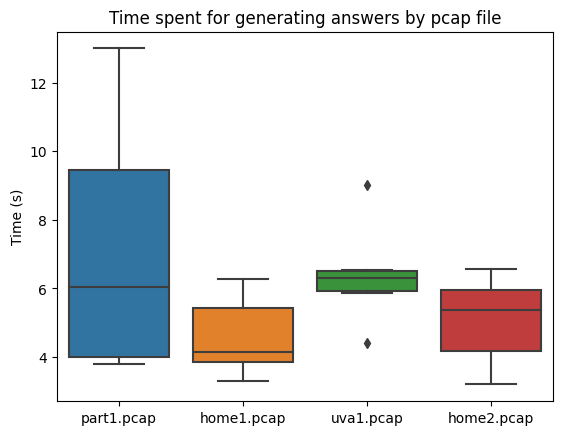

In [109]:
boxplot = sns.boxplot(x='pcap_file', y='time', data=df)
boxplot.set_xlabel('');
boxplot.set_ylabel('Time (s)');
boxplot.set_title('Time spent for generating answers by pcap file');

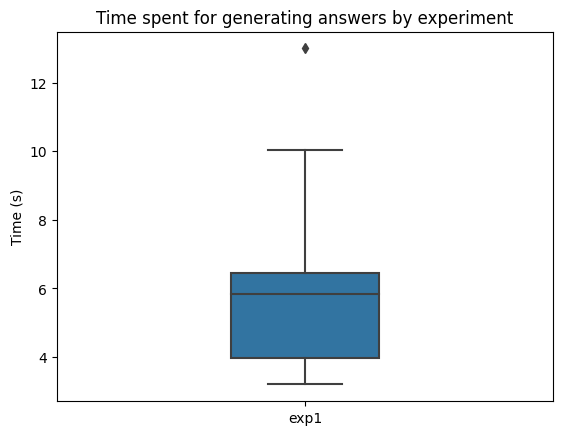

In [110]:
boxplot = sns.boxplot(data=df, x='exp', y='time', width=0.3)
boxplot.set_xlabel('');
boxplot.set_ylabel('Time (s)');
boxplot.set_title('Time spent for generating answers by experiment');

In [111]:
q_status = df.groupby(['exp','pcap_file','status']).count().rename(columns={'time': 'count'}).reset_index()
q_status

,exp,pcap_file,status,count
0,exp1,home1.pcap,Correct output,6
1,exp1,home2.pcap,Correct output,6
2,exp1,part1.pcap,Correct output,6
3,exp1,uva1.pcap,Correct output,6


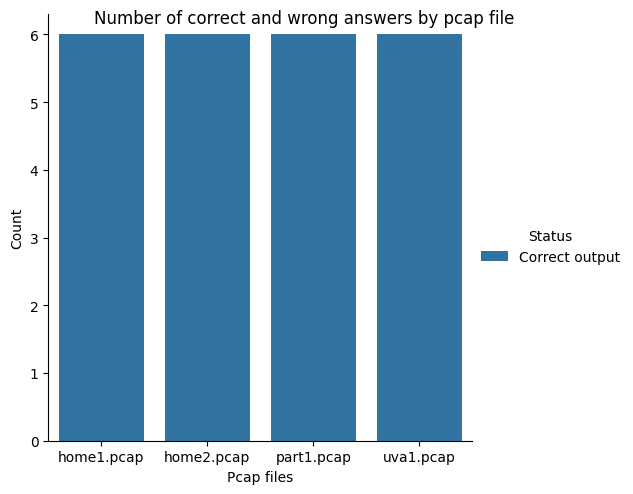

In [112]:
barplot = sns.catplot(data=q_status, kind='bar', x='pcap_file', y='count', hue='status')
barplot.set_axis_labels('Pcap files','Count');
barplot.legend.set_title('Status');
barplot.fig.suptitle('Number of correct and wrong answers by pcap file');

In [113]:
q_status_all = df.groupby(['status']).count().rename(columns={'time': 'count'})['count'].reset_index()
q_status_all

,status,count
0,Correct output,24


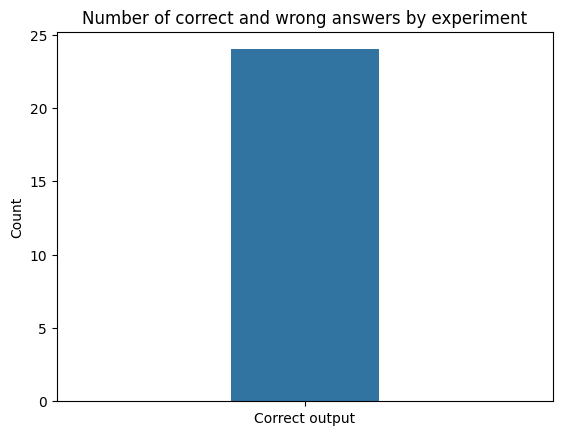

In [115]:
barplot = sns.barplot(data=q_status_all, x='status', y='count', width=0.3)
barplot.set_xlabel('');
barplot.set_ylabel('Count');
barplot.set_title('Number of correct and wrong answers by experiment');